In [ ]:
import os
import pandas as pd
from yaml import safe_load

# Dossier contenant les runs MLflow (expérience 0)
mlruns_path = "mlruns/0"

# Liste pour stocker les données combinées
combined_data = []

# Parcours des sous-dossiers de runs
for run_id in os.listdir(mlruns_path):
    run_dir = os.path.join(mlruns_path, run_id)
    if not os.path.isdir(run_dir):
        continue

    # Dictionnaire pour stocker les données de ce run
    run_data = {"run_id": run_id}

    # Récupération des params
    params_path = os.path.join(run_dir, "params")
    if os.path.exists(params_path):
        for param_file in os.listdir(params_path):
            with open(os.path.join(params_path, param_file), "r") as f:
                value = f.read().strip()
                run_data[param_file] = value  # clé = nom du paramètre

    # Récupération des metrics (dernière valeur de chaque métrique)
    metrics_path = os.path.join(run_dir, "metrics")
    if os.path.exists(metrics_path):
        for metric_file in os.listdir(metrics_path):
            with open(os.path.join(metrics_path, metric_file), "r") as f:
                lines = [line.strip() for line in f if line.strip()]
                if lines:
                    # Format: step timestamp value (on prend la dernière ligne)
                    last_value = float(lines[-1].split(" ")[1])
                    run_data[metric_file] = last_value  # clé = nom de la métrique

    combined_data.append(run_data)

# Création du DataFrame combiné
combined_df = pd.DataFrame(combined_data)


combined_df

,run_id,beta,unlearn,seed,unlearn_lr,class_to_replace,quantile,num_indexes_to_replace,dataset,unlearn_epochs,...,MIA_prob,MIA_correctness,MIA_m_entropy,Fid,RTE,forget,relativeUA,MIA_entropy,retain,val
0,4baab073276745408e84a64315af694f,0.95,SRGradMask,3,0.0001,0,0.5,1900,cifar10,2,...,0.028421,0.853684,0.281579,73.526316,5.144953,85.368421,5.631579,0.325789,97.264501,92.08
1,6dd9fa4d48bf423d9b7d88145fadf83f,0.95,SRGradMask,3,0.0001,0,0.5,1900,cifar10,7,...,0.004737,0.745263,0.009474,68.368421,5.121504,74.526316,-5.210526,0.015789,96.482599,91.58
2,c6bf430f769d47ae8c70da545eaebd92,0.95,SRGradFocus,3,0.0001,0,0.5,1900,cifar10,3,...,0.024737,0.777368,0.226316,69.789474,4.884567,77.736842,-2.000000,0.266316,96.491879,91.22
3,ca0835083b9943c9b8fe57aa13c10e99,0.95,SRL,3,0.0001,0,0.5,1900,cifar10,8,...,0.013158,0.735789,0.045789,68.631579,4.143407,73.578947,-6.157895,0.067368,96.865429,92.14
4,1e8f2849fa4640178b8fc42a2eafa136,0.95,SRGradFocus,3,0.0001,0,0.5,1900,cifar10,10,...,0.003684,0.784211,0.035789,70.210526,4.950917,78.421053,-1.315789,0.048421,97.220418,92.90
5,2e11c91b8ab1415ea541e8e9741d71c9,0.95,SalUn,3,0.0001,0,0.5,1900,cifar10,1,...,0.078947,0.754737,0.337895,69.052632,7.035221,75.473684,-4.263158,0.389474,97.067285,91.54
6,b896d0bae6434eefa8a1b848c25ffebc,0.95,SalUn,3,0.0001,0,0.5,1900,cifar10,7,...,0.014211,0.580526,0.009474,57.736842,6.386628,58.052631,-21.684211,0.014737,95.053364,89.52
7,1052b1d610064a3b85a6cbbd9240d9ee,0.95,SalUn,3,0.0001,0,0.5,1900,cifar10,10,...,0.007368,0.616842,0.012105,60.000000,6.436418,61.684210,-18.052632,0.012632,95.542923,90.60
8,726158643cca4064a567caa582faad18,0.95,SRL,3,0.0001,0,0.5,1900,cifar10,7,...,0.014737,0.724211,0.041579,67.947368,4.144909,72.421053,-7.315789,0.063158,96.607889,91.90
9,7d1ac0ff36a84622a4729d546808b443,0.95,SRGradFocus,3,0.0001,0,0.5,1900,cifar10,4,...,0.013158,0.778947,0.143158,70.000000,5.122776,77.894737,-1.842105,0.183684,96.705336,91.86


In [ ]:
os.listdir(mlruns_path)

['4baab073276745408e84a64315af694f',
 '6dd9fa4d48bf423d9b7d88145fadf83f',
 'c6bf430f769d47ae8c70da545eaebd92',
 'ca0835083b9943c9b8fe57aa13c10e99',
 '1e8f2849fa4640178b8fc42a2eafa136',
 '2e11c91b8ab1415ea541e8e9741d71c9',
 'b896d0bae6434eefa8a1b848c25ffebc',
 '1052b1d610064a3b85a6cbbd9240d9ee',
 '726158643cca4064a567caa582faad18',
 '7d1ac0ff36a84622a4729d546808b443',
 'd27a267fdb6341cd99d172dfc3e7c390',
 '488e865d349e4bdda6e58d3eb233b2ce',
 '825e8932cded4849930691a2dbf9f985',
 '12dc024386b445518848d4f15322b10d',
 '4a6ee53bf1794e598e0c16c53ba12781',
 'b6f265736ddb42cbb5d0d3c8230be64d',
 'e6f506270dfe4713bba1fbf73c688fc1',
 '24772494a72a44acbfec60bc13ee290d',
 '319def9da8aa46e18f9139cc75e53da8',
 '3cef0e22664641709af24192bcdde1c3',
 '8e462218747b4064a1d35748e39add58',
 'bc2c8f8b6dc44c2ba9b273cd4f0ea890',
 'df4374ba8f8e48cb930e879aff541112',
 'fd3dc4540fd44f80927a533fb3f4973a',
 'aa142bffc74e43a28aafc31603aa3dfa',
 '24c70a8d19094a15aab7d88daae87187',
 'a14e5e31fadc4cfab600eee2158f7b82',
 

In [ ]:
combined_df

,run_id,beta,unlearn,seed,unlearn_lr,class_to_replace,quantile,num_indexes_to_replace,dataset,unlearn_epochs,...,MIA_prob,MIA_correctness,MIA_m_entropy,Fid,RTE,forget,relativeUA,MIA_entropy,retain,val
0,4baab073276745408e84a64315af694f,0.95,SRGradMask,3,0.0001,0,0.5,1900,cifar10,2,...,0.028421,0.853684,0.281579,73.526316,5.144953,85.368421,5.631579,0.325789,97.264501,92.08
1,6dd9fa4d48bf423d9b7d88145fadf83f,0.95,SRGradMask,3,0.0001,0,0.5,1900,cifar10,7,...,0.004737,0.745263,0.009474,68.368421,5.121504,74.526316,-5.210526,0.015789,96.482599,91.58
2,c6bf430f769d47ae8c70da545eaebd92,0.95,SRGradFocus,3,0.0001,0,0.5,1900,cifar10,3,...,0.024737,0.777368,0.226316,69.789474,4.884567,77.736842,-2.000000,0.266316,96.491879,91.22
3,ca0835083b9943c9b8fe57aa13c10e99,0.95,SRL,3,0.0001,0,0.5,1900,cifar10,8,...,0.013158,0.735789,0.045789,68.631579,4.143407,73.578947,-6.157895,0.067368,96.865429,92.14
4,1e8f2849fa4640178b8fc42a2eafa136,0.95,SRGradFocus,3,0.0001,0,0.5,1900,cifar10,10,...,0.003684,0.784211,0.035789,70.210526,4.950917,78.421053,-1.315789,0.048421,97.220418,92.90
5,2e11c91b8ab1415ea541e8e9741d71c9,0.95,SalUn,3,0.0001,0,0.5,1900,cifar10,1,...,0.078947,0.754737,0.337895,69.052632,7.035221,75.473684,-4.263158,0.389474,97.067285,91.54
6,b896d0bae6434eefa8a1b848c25ffebc,0.95,SalUn,3,0.0001,0,0.5,1900,cifar10,7,...,0.014211,0.580526,0.009474,57.736842,6.386628,58.052631,-21.684211,0.014737,95.053364,89.52
7,1052b1d610064a3b85a6cbbd9240d9ee,0.95,SalUn,3,0.0001,0,0.5,1900,cifar10,10,...,0.007368,0.616842,0.012105,60.000000,6.436418,61.684210,-18.052632,0.012632,95.542923,90.60
8,726158643cca4064a567caa582faad18,0.95,SRL,3,0.0001,0,0.5,1900,cifar10,7,...,0.014737,0.724211,0.041579,67.947368,4.144909,72.421053,-7.315789,0.063158,96.607889,91.90
9,7d1ac0ff36a84622a4729d546808b443,0.95,SRGradFocus,3,0.0001,0,0.5,1900,cifar10,4,...,0.013158,0.778947,0.143158,70.000000,5.122776,77.894737,-1.842105,0.183684,96.705336,91.86


40


/var/folders/17/d5wm_d6x5zv68h4w18r3246h4xmqkj/T/ipykernel_54105/2599978803.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(methods))


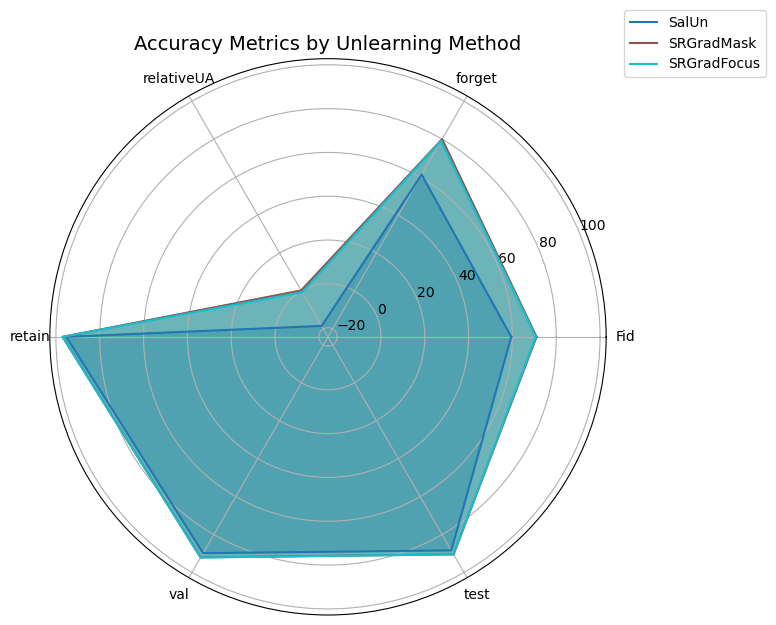

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = combined_df.copy()
df = df[(df["num_indexes_to_replace"] == "1900")]
# df['relativeUA'] = 100 - df['relativeUA'].astype(float)
print(len(df))

# --- Étape 1 : sélectionner les colonnes d'accuracy ---
accuracy_cols = ['Fid','forget',
       'relativeUA', 'retain', 'val', 'test']
methods = df["unlearn"].unique()
methods = ["SalUn", "SRGradMask", "SRGradFocus"]

# --- Étape 2 : calcul des moyennes par méthode ---
method_means = df.groupby("unlearn")[accuracy_cols].mean()

# --- Étape 3 : construction du radar plot ---
# Préparation des angles
labels = accuracy_cols
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # boucle fermée

# Style
plt.figure(figsize=(8, 8))
plt.subplot(111, polar=True)

# Couleurs pour les différentes méthodes
colors = plt.cm.get_cmap("tab10", len(methods))

# Tracer chaque méthode
for idx, method in enumerate(methods):
    try:
        values = method_means.loc[method].tolist()
        values += values[:1]  # boucle fermée
        plt.plot(angles, values, label=method, color=colors(idx))
        plt.fill(angles, values, alpha=0.5, color=colors(idx))
    except KeyError:
        print(f"Warning: Method '{method}' not found in the DataFrame.")

# Labels axes
plt.xticks(angles[:-1], labels)
plt.title("Accuracy Metrics by Unlearning Method", size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


In [ ]:
df[df["unlearn"] == "EspGrad"]

,run_id,beta,unlearn,seed,unlearn_lr,class_to_replace,quantile,num_indexes_to_replace,dataset,unlearn_epochs,...,MIA_prob,MIA_correctness,MIA_m_entropy,Fid,RTE,forget,relativeUA,MIA_entropy,retain,val


In [ ]:
df.columns

Index(['run_id', 'beta', 'unlearn', 'seed', 'unlearn_lr', 'class_to_replace',
       'quantile', 'num_indexes_to_replace', 'dataset', 'unlearn_epochs',
       'arch', 'model', 'save_dir', 'MIA_confidence', 'test', 'MIA_prob',
       'MIA_correctness', 'MIA_m_entropy', 'Fid', 'RTE', 'forget',
       'relativeUA', 'MIA_entropy', 'retain', 'val'],
      dtype='object')

In [ ]:
df["unlearn_epochs"] = df["unlearn_epochs"].astype(int)
df.sort_values(by="unlearn_epochs", inplace=True)

# Index(['run_id', 'beta', 'unlearn_method', 'unlearn', 'unlearn_lr', 'quantile',
#    'num_indexes_to_replace', 'unlearn_epochs', 'model', 'save_dir', 'seed',
#    'class_to_replace', 'dataset', 'arch', 'MIA_confidence', 'test',
#    'MIA_prob', 'MIA_correctness', 'MIA_m_entropy', 'Fid', 'RTE', 'forget',
#    'relativeUA', 'MIA_entropy', 'retain', 'val'],
#   dtype='object')

# convert all metrics to float
for col in df.columns:
    if col not in ["run_id", "unlearn", "unlearn_method", "model", "save_dir", "num_indexes_to_replace", "class_to_replace", "unlearn_epochs", "dataset", "arch"]:
        print(col)
        df[col] = df[col].astype(float)
# mean with respect to seed
df_mean = df.groupby(["run_id", "unlearn", "model", "save_dir", "num_indexes_to_replace", "class_to_replace", "unlearn_epochs", "dataset", "arch"]).mean().reset_index()
df_mean

beta
seed
unlearn_lr
quantile
MIA_confidence
test
MIA_prob
MIA_correctness
MIA_m_entropy
Fid
RTE
forget
relativeUA
MIA_entropy
retain
val


,run_id,unlearn,model,save_dir,num_indexes_to_replace,class_to_replace,unlearn_epochs,dataset,arch,beta,...,MIA_prob,MIA_correctness,MIA_m_entropy,Fid,RTE,forget,relativeUA,MIA_entropy,retain,val
0,074d6e5a9ffd4456b1834a8f3cb9d004,SalUn,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,1900,0,9,cifar10,resnet18,0.95,...,0.008947,0.623158,0.016316,60.631579,6.325461,62.315789,-17.421053,0.022105,95.531323,90.40
1,1052b1d610064a3b85a6cbbd9240d9ee,SalUn,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,1900,0,10,cifar10,resnet18,0.95,...,0.007368,0.616842,0.012105,60.000000,6.436418,61.684210,-18.052632,0.012632,95.542923,90.60
2,12dc024386b445518848d4f15322b10d,SRGradMask,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,1900,0,5,cifar10,resnet18,0.95,...,0.004211,0.773158,0.086316,69.684211,5.009102,77.315790,-2.421053,0.118421,96.529002,91.54
3,14bdd8434c3d4f9f92658c43c9f8ab5a,SalUn,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,1900,0,4,cifar10,resnet18,0.95,...,0.030526,0.590000,0.032105,57.421053,6.447015,59.000000,-20.736842,0.046316,94.932715,89.30
4,1e8f2849fa4640178b8fc42a2eafa136,SRGradFocus,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,1900,0,10,cifar10,resnet18,0.95,...,0.003684,0.784211,0.035789,70.210526,4.950917,78.421053,-1.315789,0.048421,97.220418,92.90
5,24772494a72a44acbfec60bc13ee290d,SRGradFocus,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,1900,0,9,cifar10,resnet18,0.95,...,0.005263,0.793684,0.050526,70.736842,4.882332,79.368421,-0.368421,0.064211,97.262181,92.66
6,24c70a8d19094a15aab7d88daae87187,SRGradMask,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,1900,0,6,cifar10,resnet18,0.95,...,0.001579,0.752105,0.026842,68.526316,5.057747,75.210526,-4.526316,0.042105,96.373550,91.28
7,2e11c91b8ab1415ea541e8e9741d71c9,SalUn,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,1900,0,1,cifar10,resnet18,0.95,...,0.078947,0.754737,0.337895,69.052632,7.035221,75.473684,-4.263158,0.389474,97.067285,91.54
8,319def9da8aa46e18f9139cc75e53da8,SRGradFocus,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,1900,0,5,cifar10,resnet18,0.95,...,0.009474,0.767368,0.121579,69.052632,4.944054,76.736842,-3.000000,0.144211,96.747100,91.74
9,3cef0e22664641709af24192bcdde1c3,SRGradFocus,./results/cifar10/cifar10_resnet18_3model.pth.tar,./results/cifar10,1900,0,6,cifar10,resnet18,0.95,...,0.007368,0.764211,0.064211,69.526316,4.967820,76.421053,-3.315789,0.088947,96.631090,91.76


In [ ]:
group_cols = ["unlearn", "num_indexes_to_replace", "class_to_replace", "unlearn_epochs"]

# Vérifie qu'elles existent
group_cols = [col for col in group_cols if col in df.columns]

# Colonnes numériques sans celles du groupby
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols = [col for col in numeric_cols if col not in group_cols]

# Debugging
print("Group columns:", group_cols)
print("Numeric columns:", numeric_cols)
print("DataFrame shape:", df.shape)

df_mean = df[group_cols + numeric_cols].groupby(group_cols).mean().reset_index()

df_std = df[group_cols + numeric_cols].groupby(group_cols).std().reset_index()
df_mean = df_mean.merge(df_std, on=group_cols, suffixes=('', '_std'))

df_mean.sort_values(by="unlearn_epochs", inplace=True)
df_mean

Group columns: ['unlearn', 'num_indexes_to_replace', 'class_to_replace', 'unlearn_epochs']
Numeric columns: ['beta', 'seed', 'unlearn_lr', 'quantile', 'MIA_confidence', 'test', 'MIA_prob', 'MIA_correctness', 'MIA_m_entropy', 'Fid', 'RTE', 'forget', 'relativeUA', 'MIA_entropy', 'retain', 'val']
DataFrame shape: (40, 25)


,unlearn,num_indexes_to_replace,class_to_replace,unlearn_epochs,beta,seed,unlearn_lr,quantile,MIA_confidence,test,...,MIA_prob_std,MIA_correctness_std,MIA_m_entropy_std,Fid_std,RTE_std,forget_std,relativeUA_std,MIA_entropy_std,retain_std,val_std
0,SRGradFocus,1900,0,1,0.95,3.0,0.0001,0.5,0.782632,92.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,SalUn,1900,0,1,0.95,3.0,0.0001,0.5,0.559474,90.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,SRGradMask,1900,0,1,0.95,3.0,0.0001,0.5,0.828947,92.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,SRL,1900,0,1,0.95,3.0,0.0001,0.5,0.765263,92.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,SRL,1900,0,2,0.95,3.0,0.0001,0.5,0.504737,90.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SRGradFocus,1900,0,2,0.95,3.0,0.0001,0.5,0.534211,90.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,SalUn,1900,0,2,0.95,3.0,0.0001,0.5,0.282632,87.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,SRGradMask,1900,0,2,0.95,3.0,0.0001,0.5,0.591579,91.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SRGradFocus,1900,0,3,0.95,3.0,0.0001,0.5,0.385263,90.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,SRGradMask,1900,0,3,0.95,3.0,0.0001,0.5,0.392632,90.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_mean[df_mean["unlearn_epochs"] == 10][['unlearn','RTE','Fid', 'forget', 'relativeUA', 'retain', 'val', 'test','MIA_confidence', 'MIA_prob', 'MIA_correctness', 'MIA_m_entropy']]

,unlearn,RTE,Fid,forget,relativeUA,retain,val,test,MIA_confidence,MIA_prob,MIA_correctness,MIA_m_entropy
19,SRGradMask,5.045816,70.263158,77.157895,-2.578947,97.013921,92.46,90.29,0.134737,0.002632,0.771579,0.008947
9,SRGradFocus,4.950917,70.210526,78.421053,-1.315789,97.220418,92.90,90.47,0.178421,0.003684,0.784211,0.035789
29,SRL,4.140661,70.157895,78.000000,-1.736842,97.248260,93.00,90.48,0.243684,0.008947,0.780000,0.070000
39,SalUn,6.436418,60.000000,61.684210,-18.052632,95.542923,90.60,88.52,0.124211,0.007368,0.616842,0.012105


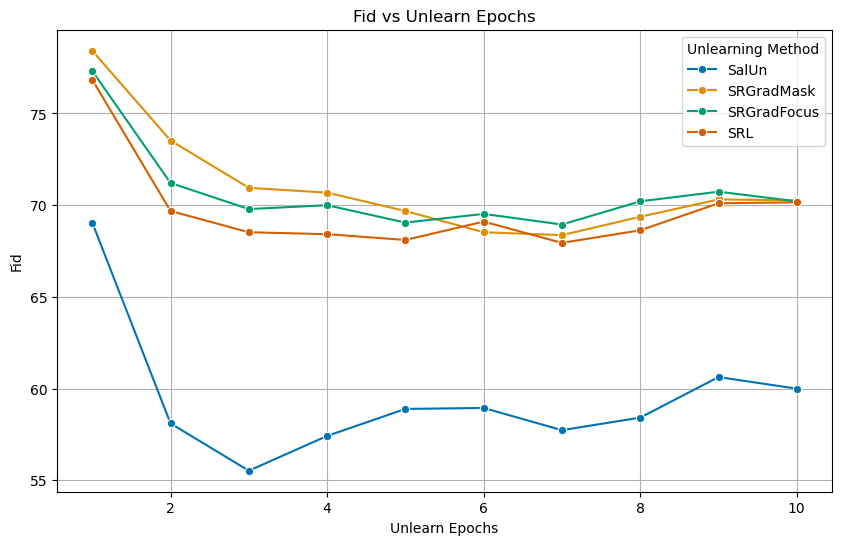

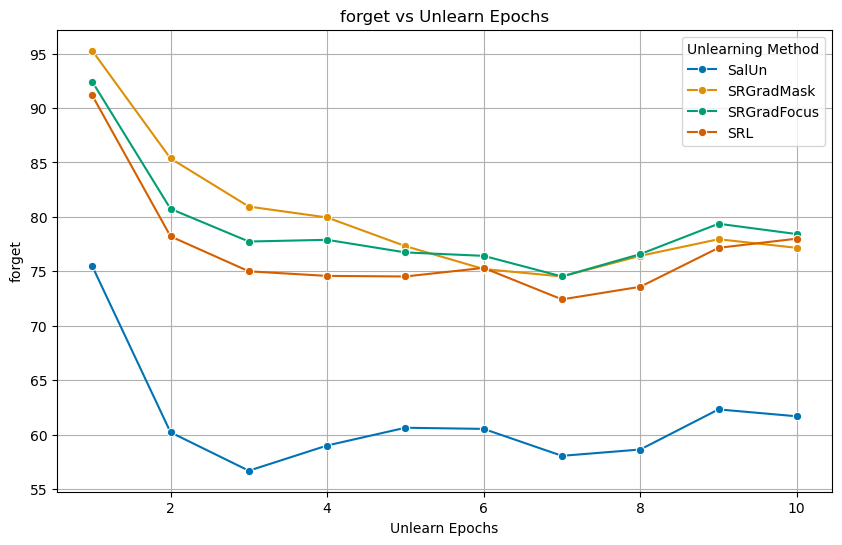

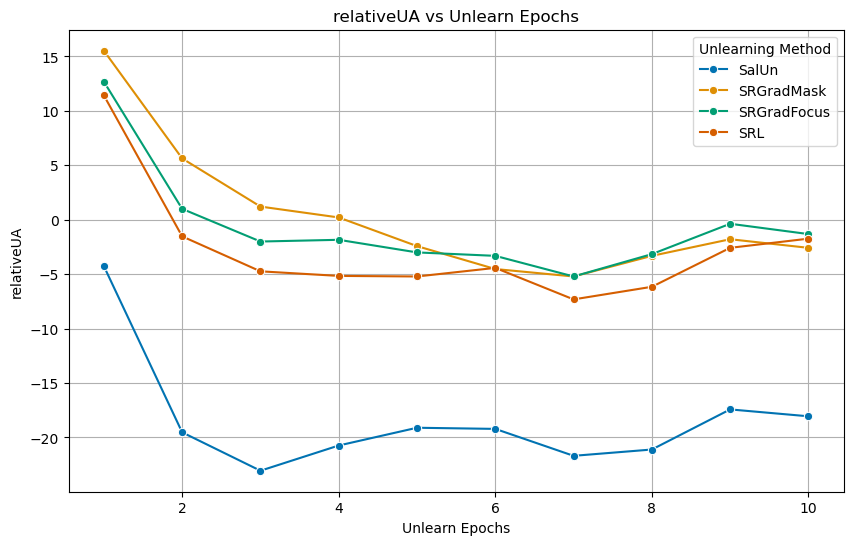

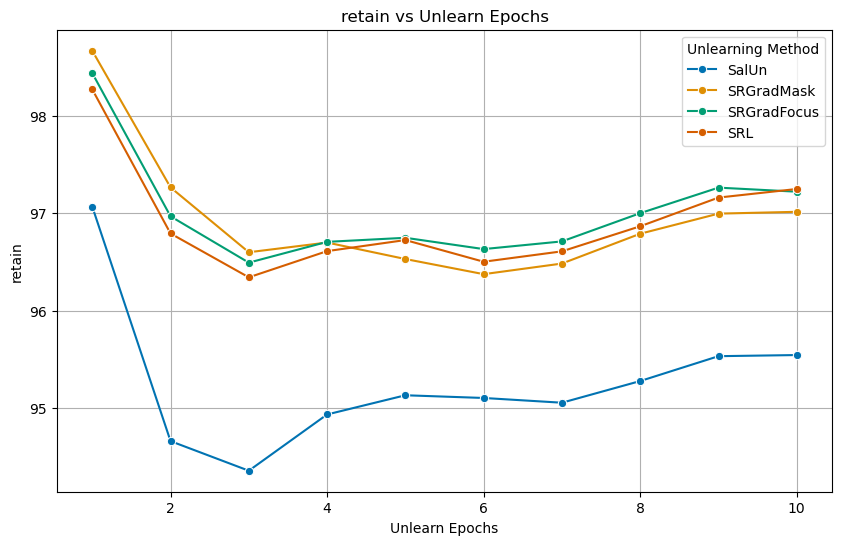

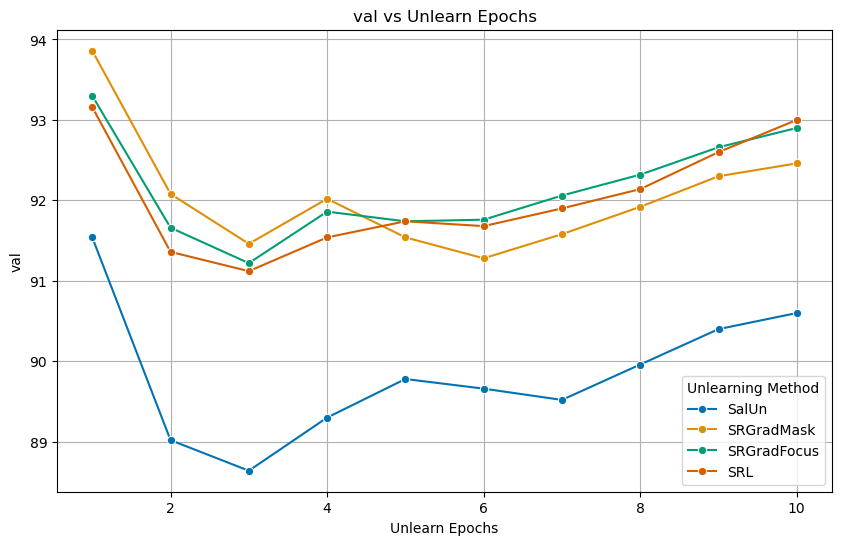

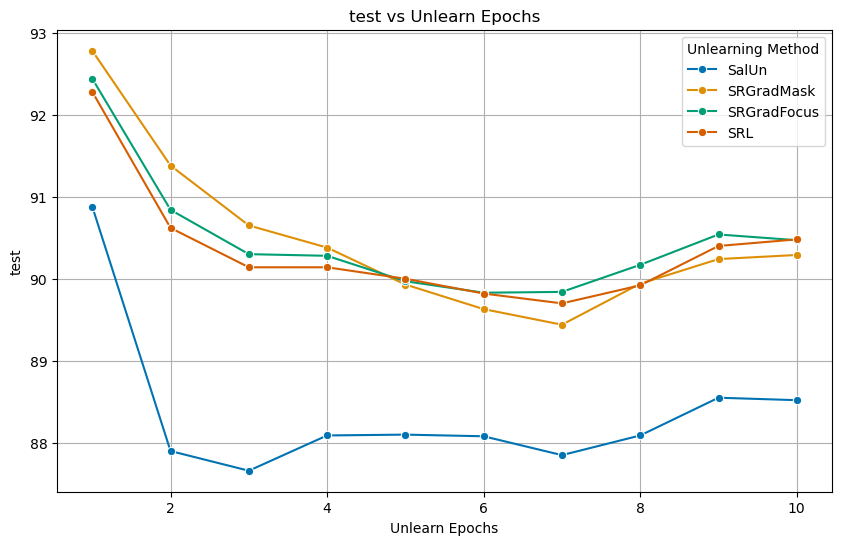

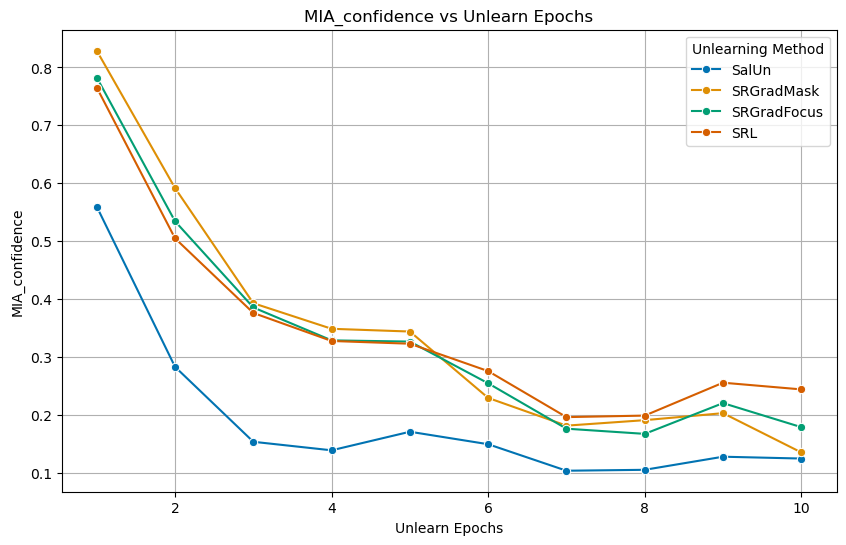

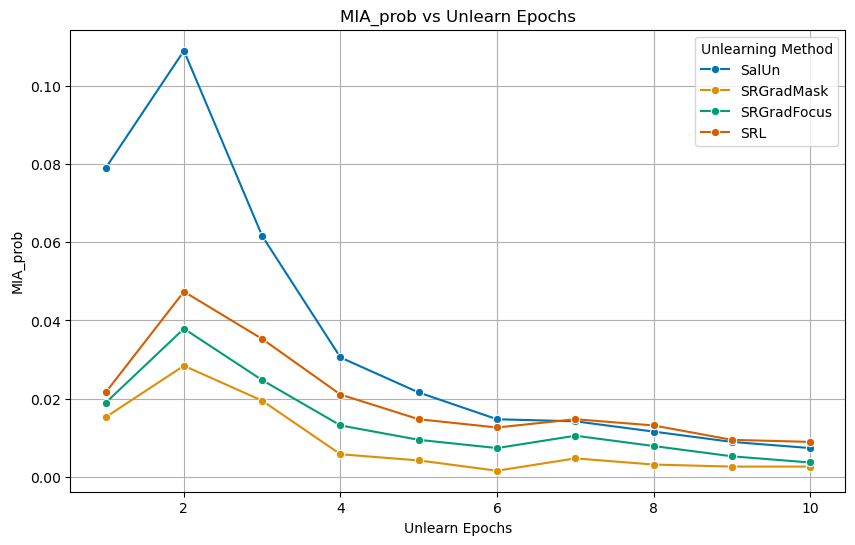

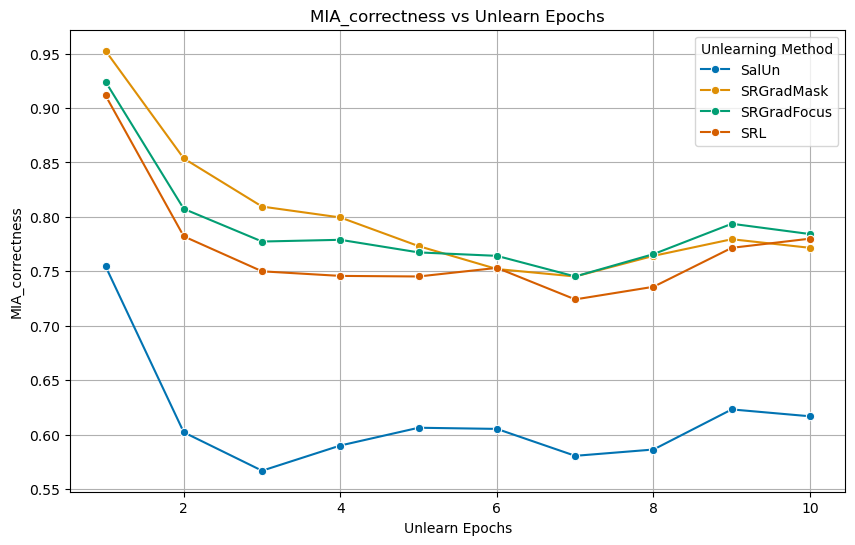

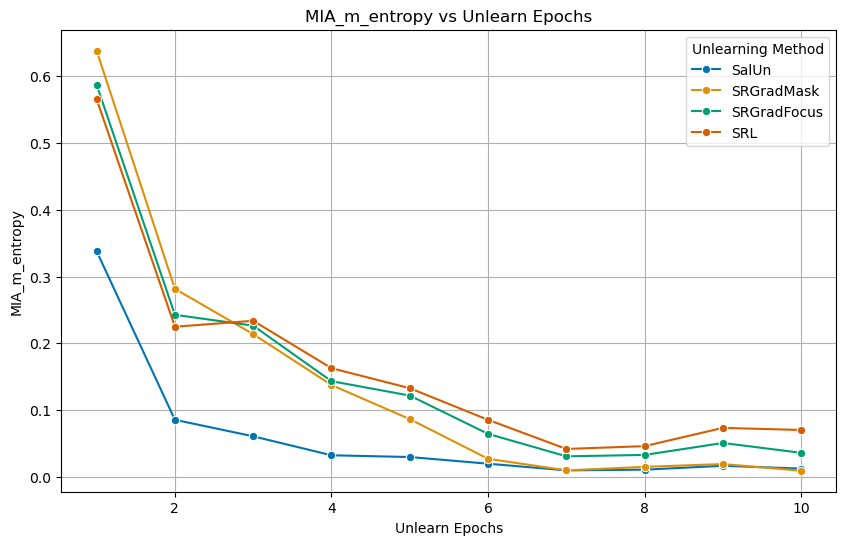

In [ ]:
# plot metrics en fonction du nombre de unlearn_epochs
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("colorblind")
df["unlearn_epochs"] = df["unlearn_epochs"].astype(int)
df.sort_values(by="unlearn_epochs", inplace=True)
for metric in ['Fid', 'forget', 'relativeUA', 'retain', 'val', 'test','MIA_confidence', 'MIA_prob', 'MIA_correctness', 'MIA_m_entropy']:
    plt.figure(figsize=(10, 6))
    # sns.lineplot(data=df[df['unlearn'].isin(["SalUn", "SRL", "EspGrad", "VarGrad"])], x='unlearn_epochs', y=metric, hue='unlearn', marker='o', sort=True)
    sns.lineplot(data=df, x='unlearn_epochs', y=metric, hue='unlearn', marker='o', sort=True)
    
    plt.title(f'{metric} vs Unlearn Epochs')
    plt.xlabel('Unlearn Epochs')
    plt.ylabel(metric)
    plt.legend(title='Unlearning Method')
    plt.grid(True)
    plt.show()

In [ ]:
# import torch
# import os
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib as mpl

# # Configuration matplotlib pour rendu publication
# mpl.rcParams.update({
#     'font.family': 'serif',
#     'font.size': 12,
#     'axes.titlesize': 16,
#     'axes.labelsize': 14,
#     'legend.fontsize': 12,
#     'xtick.labelsize': 12,
#     'ytick.labelsize': 12,
#     'text.usetex': False,  # Peut être mis à True si tu compiles en LaTeX
# })

# # Couleurs sobres pour publication
# main_color = "#1f77b4"       # bleu scientifique
# hist_color = "#aec7e8"        # bleu clair

# # Chargement des tensors VMask
# VMask = {}
# for epoch in range(5):
#     VMask[epoch] = {}
#     for idx in range(5):
#         vmask_path = f"./results/cifar10/vmask/vmask_{idx}_{epoch}.pt"
#         if os.path.exists(vmask_path):
#             vmask = torch.load(vmask_path)
#             print(f"Loaded vmask from {vmask_path} with shape {vmask.shape}")
#             VMask[epoch][idx] = vmask

# # Affichage de la distribution avec histogramme + KDE
# for epoch, masks in VMask.items():
#     all_masks = torch.cat([mask.flatten() for mask in masks.values()])
#     values = all_masks.cpu().numpy()
#     mean_val = values.mean()
#     std_val = values.std()
#     count = len(values)

#     print(f"Epoch {epoch}: Mean={mean_val:.4f}, Std={std_val:.4f}, Count={count}")

#     plt.figure(figsize=(10, 6))

#     # Histogramme
#     sns.histplot(
#         values,
#         bins=80,
#         stat="density",
#         color=hist_color,
#         edgecolor="black",
#         alpha=0.5,
#         label="Histogram"
#     )

#     # KDE
#     sns.kdeplot(
#         values,
#         color=main_color,
#         linewidth=2.5,
#         bw_adjust=0.5,
#         label="Density (KDE)"
#     )

#     # Titres et légendes
#     plt.title("Distribution of the Probability", pad=10)
#     plt.suptitle(f"Mean = {mean_val:.4f} | Std = {std_val:.4f} | N = {count}", fontsize=10, y=0.95, color='gray')

#     plt.xlabel("Values of $\mathbb{P}[XY > 0| \hat X,\hat Y]$")
#     plt.ylabel("Density")
#     plt.grid(True, linestyle='--', alpha=0.4)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()


In [ ]:
x,y = 0, 0
a ,b = x,y
a = a +1
a,x

(1, 0)